In [2]:
from test1 import train_presention as train_task1
from test1 import test_presention1 as test_task1
from test2 import train_presention as train_task3
from test2 import task2_test as test_task3
from test3 import train_presention as train_task2
from newtest3 import task3_presention as test_task2
from test4 import train_presention as train_task4
from test4 import test_presention as test_task4


import numpy as np
import os
from PIL import Image
import matplotlib.pyplot as plt

In [11]:
# train task1
train_task1(epochs=5, batch_size=32, lr=0.01,device='cuda:0')

Model: self.time_weight/self.time_weight.mean()=tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])


Epoch 1/5: 100%|██████████| 4/4 [00:00<00:00,  9.44it/s]


Epoch [1/5], Loss: 6.2216,lr:0.010000


Epoch 2/5: 100%|██████████| 4/4 [00:00<00:00,  9.94it/s]


Epoch [2/5], Loss: 4.7516,lr:0.010000


Epoch 3/5: 100%|██████████| 4/4 [00:00<00:00,  9.32it/s]


Epoch [3/5], Loss: 3.4875,lr:0.010000


Epoch 4/5: 100%|██████████| 4/4 [00:00<00:00,  9.70it/s]


Epoch [4/5], Loss: 3.3714,lr:0.010000


Epoch 5/5: 100%|██████████| 4/4 [00:00<00:00,  9.40it/s]

Epoch [5/5], Loss: 3.0550,lr:0.010000


[61]
Model: self.time_weight/self.time_weight.mean()=tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])
tensor(14165) tensor(16979)
traj [14165, 14136, 13973, 21921, 13979, 21922, 16979, 0, 0, 0

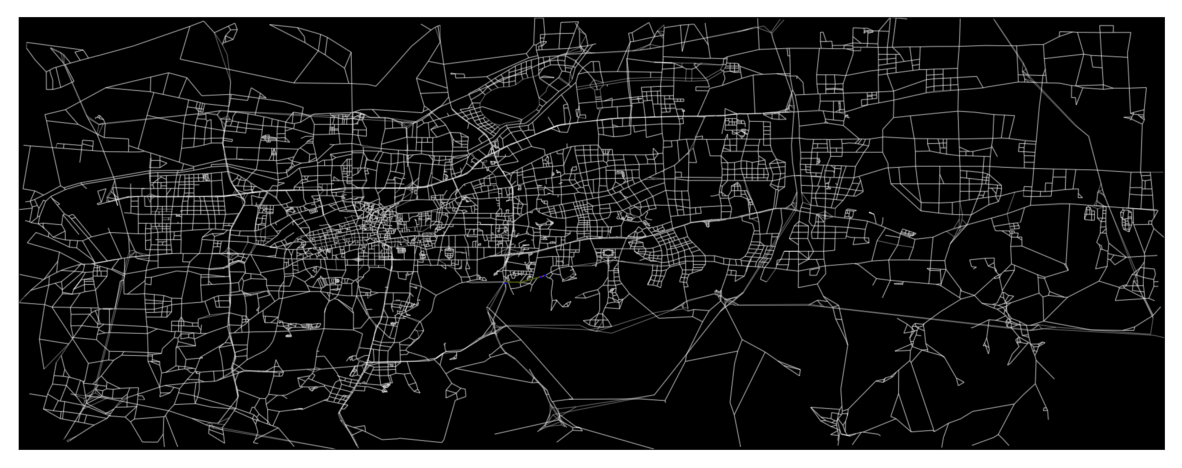

In [17]:
k = np.random.choice(np.arange(0,99), 1)
print(k)
test_task1(k[0])
path1 = 'task1/video/dj/frames/frame_8.png'
img1 = Image.open(path1)
plt.figure(figsize=(15, 20))
plt.imshow(img1)
plt.axis('off')
plt.show()

In [14]:
# task2
train_task2(epochs=3,batch_size=16,device='cuda:0',lr=0.01) #

Train epoch      1/3     : 100%|██████████| 7/7 [00:05<00:00,  1.31it/s]


Train epoch      1/3     |  Loss: 9.31316280  | LR: 0.00750000  | Load data time: 0.00...m  |  Preprocess data time: 0.02   m  |  Forward time: 0.02   m  |  Backward time: 0.05   m  |  Total time: 0.09   m


Train epoch      2/3     : 100%|██████████| 7/7 [00:05<00:00,  1.31it/s]


Train epoch      2/3     |  Loss: 8.69398785  | LR: 0.00250000  | Load data time: 0.00...m  |  Preprocess data time: 0.02   m  |  Forward time: 0.02   m  |  Backward time: 0.05   m  |  Total time: 0.09   m


Train epoch      3/3     : 100%|██████████| 7/7 [00:05<00:00,  1.33it/s]

Train epoch      3/3     |  Loss: 8.38904667  | LR: 0.00000000  | Load data time: 0.00...m  |  Preprocess data time: 0.02   m  |  Forward time: 0.02   m  |  Backward time: 0.05   m  |  Total time: 0.09   m


pos: 8908, edges: 23312


Loading trajectories: 1184417it [01:25, 13918.24it/s]
Transfering jinan points into trajectories: 100%|██████████| 160000/160000 [00:06<00:00, 25106.83it/s]
Loading trajectories: 1184417it [01:23, 14176.96it/s]
Transfering jinan points into trajectories: 100%|██████████| 10000/10000 [00:02<00:00, 3904.24it/s]


load_id: best_model


1000it [05:20,  3.12it/s]


finish forward, start calculate load
calculate finish, start ploting
trajectory num: 60
difference per time: [-701.09179688 -749.58203125 -772.99121094 -757.29101562 -648.41601562
 -606.99462891 -581.69628906 -507.34033203 -437.72705078 -425.21972656
 -342.859375   -364.93896484 -308.85400391 -242.5625     -221.31835938
 -197.36914062 -151.89355469 -185.28515625 -231.09521484 -120.43310547
 -172.04296875 -120.65991211 -162.15722656 -163.13867188 -123.3972168
 -128.99658203 -123.7644043   -65.65112305 -129.7434082  -111.23168945
  -75.35302734 -127.11181641  -73.23852539  -51.88842773  -53.7578125
  -68.61621094  -59.34667969  -87.09741211  -87.91906738  -66.3560791
  -25.96813965 -108.05749512  -52.65686035  -46.30847168  -23.02258301
 -164.0302124  -125.58770752  -26.05517578  -51.87487793  -27.92480469
   -6.85314941   -1.59082031 -116.31811523  -34.38098145  -67.28378296
  -66.42059326 -106.55532837  -56.90930176  -34.12957764  -22.16101074]
difference total: -11770.484375
mae 0.071

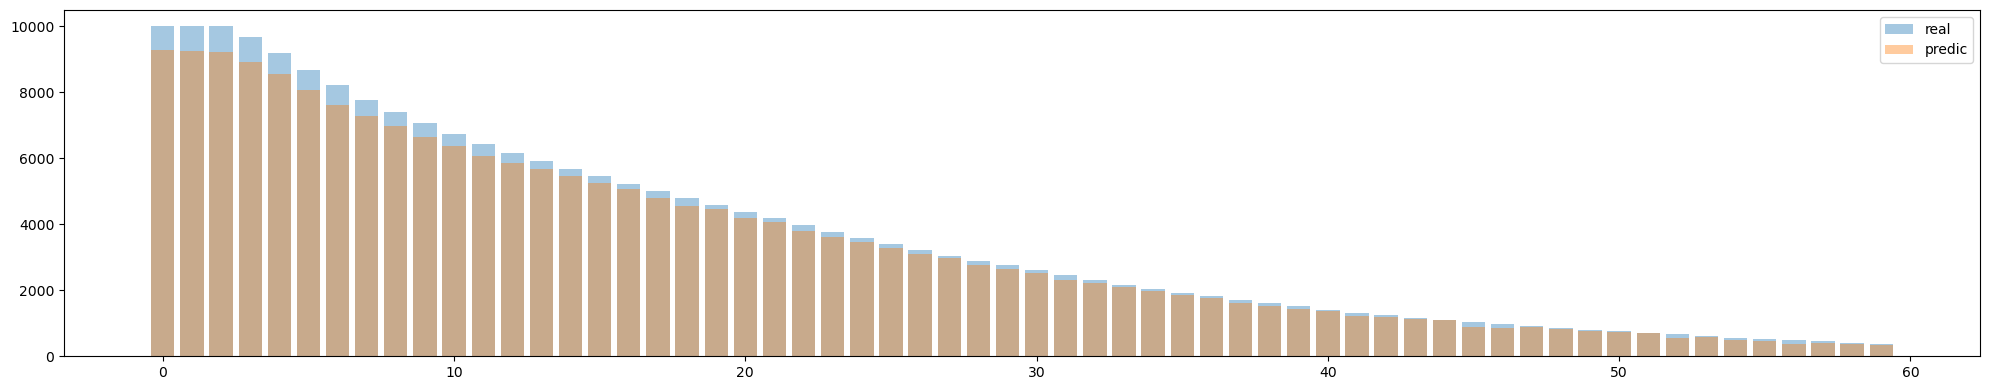

TypeError: cannot unpack non-iterable NoneType object

In [ ]:
test_task2(ratio = 0.5)

In [7]:
# task3
train_task3(epochs=4,batch_size=32,lr=0.01) #从0开始训练，为方便展示只用了少量数据

Window size: 1


Epoch 1/4: 100%|██████████| 32/32 [00:02<00:00, 12.04it/s]


epoch 1, Loss: 5.5310808047652245, LR: 0.01


Epoch 2/4: 100%|██████████| 32/32 [00:02<00:00, 13.60it/s]


epoch 2, Loss: 2.5601431652903557, LR: 0.0097


Epoch 3/4: 100%|██████████| 32/32 [00:02<00:00, 12.80it/s]


epoch 3, Loss: 2.392592642456293, LR: 0.009409


Epoch 4/4: 100%|██████████| 32/32 [00:02<00:00, 12.29it/s]

epoch 4, Loss: 2.1587591469287872, LR: 0.00912673


[70]
Window size: 1


/home/shenshiyu/SmartTrafficFramework/test2.py:83: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  indices = torch.tensor(indices,dtype=torch.int).to(cfg['device'])
/home/shenshiyu/SmartTrafficFramework/test2.py:84: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  values = torch.tensor(values,dtype=torch.float).to(cfg['device'])


Origin_Destination: [7956, 5701]
Djs spend time: 1.2532298564910889
model spend time: 0.6292707920074463
Origin_Destination: [[7956, 5701]]
car1 [7956, 5820, 7957, 4456, 1069, 1049, 8205, 1063, 4460, 4462, 4458, 4459, 4001, 4457, 8576, 8639, 3087, 3089, 8641, 8573, 8558, 3092, 8644, 3072, 3071, 3079, 1789, 4618, 4617, 5754, 159, 158, 5698, 4613, 5703, 5704, 5705, 5710, 7754, 5709, 5708, 5701]
Djs: [[7956, 5820, 7957, 4456, 1069, 1049, 8205, 1063, 4460, 4462, 4458, 4459, 4001, 4457, 8576, 8639, 3087, 3089, 8641, 8573, 8558, 3092, 8644, 3072, 3071, 3079, 1789, 4618, 4617, 5754, 159, 158, 5698, 4613, 5703, 5704, 5705, 5710, 7754, 5709, 5708, 5701]]


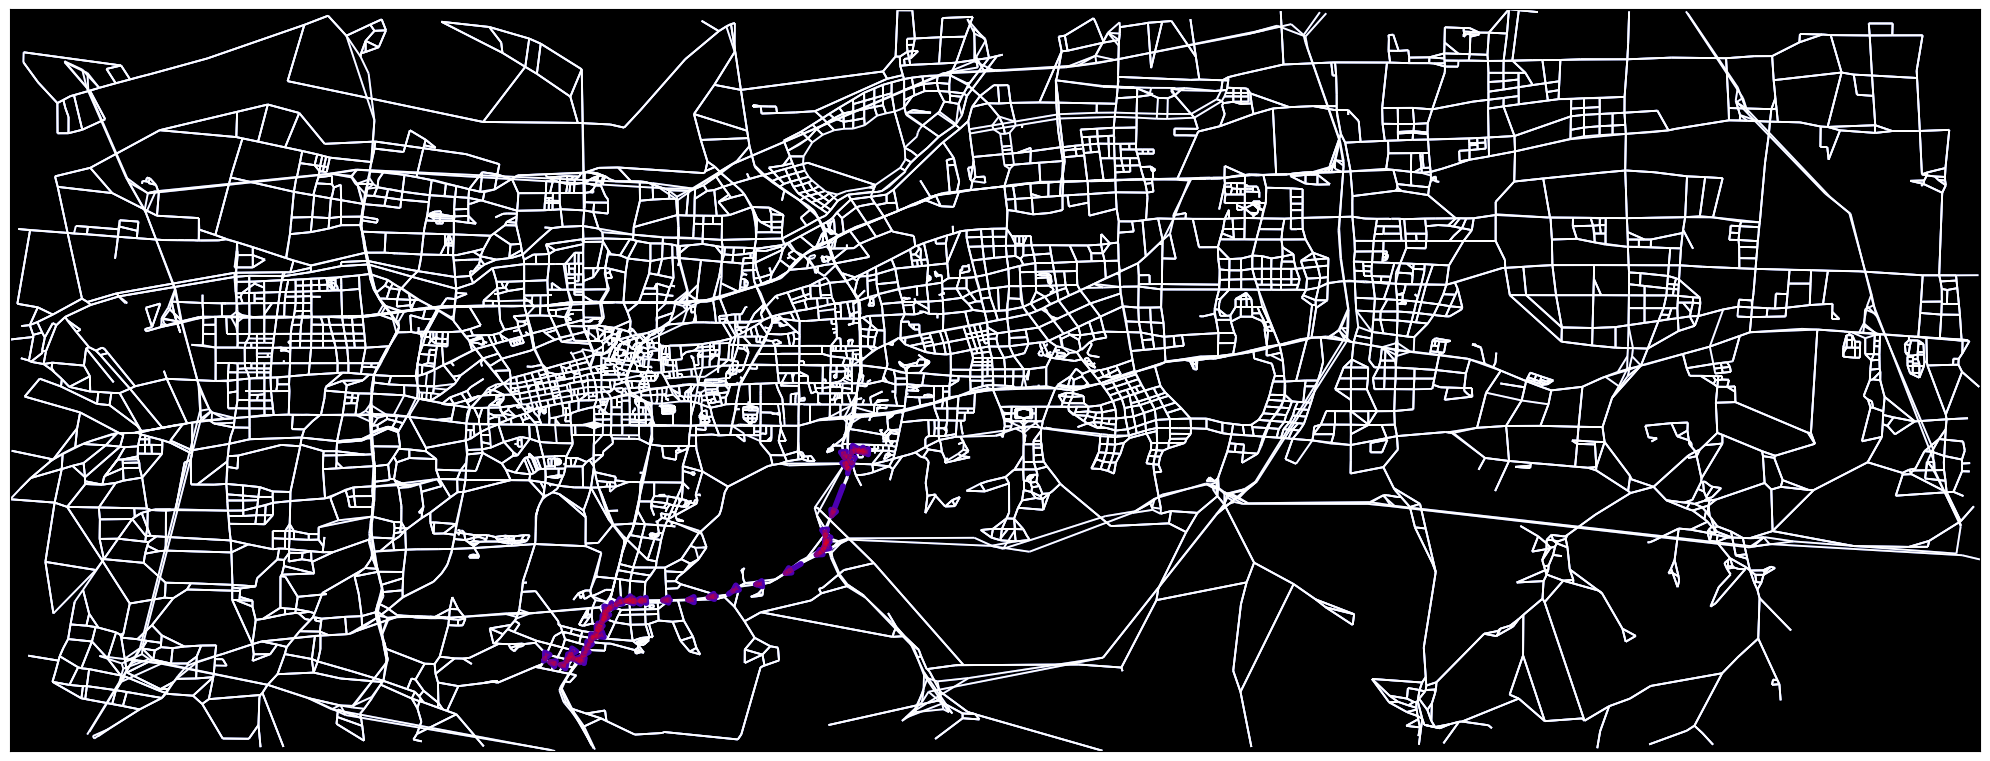

<Figure size 640x480 with 0 Axes>

In [19]:
k = np.random.choice(np.arange(0,100),1) #100为测试集大小
print(k)
im = test_task3(k)
im.show()
#红色轨迹为模型预测最短路径，蓝色轨迹为Djs算法生成的最短路径

In [20]:
# task4 
train_task4(epochs=1)

Epoch 0

Step: 0       |  Loss: 2.41655183  | Random act prob: 0.99500000  |  LR 0.001  |  Data Time: 0.05   m  |  Preprocess Time: 0.00   m  |  Act Time: 0.05   m  |  Replay Time: 0.01   m  |  Total Time: 0.11   m
Step: 1       |  Loss: 3.89445710  | Random act prob: 0.99002500  |  LR 0.001  |  Data Time: 0.00   m  |  Preprocess Time: 0.00   m  |  Act Time: 0.05   m  |  Replay Time: 0.00   m  |  Total Time: 0.05   m
Step: 2       |  Loss: 2.56074286  | Random act prob: 0.98507488  |  LR 0.001  |  Data Time: 0.00   m  |  Preprocess Time: 0.00   m  |  Act Time: 0.05   m  |  Replay Time: 0.00   m  |  Total Time: 0.05   m
Step: 3       |  Loss: 2.12518668  | Random act prob: 0.98014950  |  LR 0.001  |  Data Time: 0.00   m  |  Preprocess Time: 0.00   m  |  Act Time: 0.05   m  |  Replay Time: 0.00   m  |  Total Time: 0.05   m
Step: 4       |  Loss: 2.23583364  | Random act prob: 0.97524875  |  LR 0.001  |  Data Time: 0.00   m  |  Preprocess Time: 0.00   m  |  Act Time: 0.05   m  |  Replay T

KeyboardInterrupt: 

In [21]:
test_task4(method=1)

tensor([4, 4, 4, 4, 4], device='cuda:2', dtype=torch.int32)
tensor([[-1, -1, -1, -1, -1, -1, -1],
        [-1, -1, -1, -1, 15,  8,  1],
        [-1, -1, -1, -1,  0,  0,  0],
        [-1, -1, -1, -1,  0,  0,  0],
        [-1, -1, -1, -1,  0,  0,  0],
        [-1, -1, -1, -1,  0,  0,  0],
        [-1, -1, -1, -1,  0,  0,  0],
        [-1, -1, -1, -1,  0,  0,  0],
        [-1, -1, -1, -1,  0,  0,  0],
        [-1, -1, -1, -1, -1, -1, -1],
        [-1, -1, -1, -1,  0,  0,  0],
        [ 0,  0,  0,  0,  0, -1, -1],
        [ 0,  0,  0,  0,  0, -1, -1],
        [ 0,  0,  0,  0,  0, -1, -1],
        [ 0,  0,  0,  0,  0, -1, -1],
        [ 0,  0,  0,  0,  0, -1, -1],
        [ 0,  0,  0,  0,  0, -1, -1],
        [ 0,  0,  0,  0,  0, -1, -1],
        [ 0,  0,  0,  0,  0, -1, -1],
        [-1, -1, -1, -1,  0,  0,  0],
        [-1, -1, -1, -1,  0,  0,  0],
        [ 0,  0,  0,  0,  0, -1, -1],
        [ 0,  0,  0,  0,  0, -1, -1],
        [ 0,  0,  0,  0,  0, -1, -1],
        [ 0,  0,  0,  0,  0,